In [1]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/Test.csv'
data = pd.read_csv(file_path)

In [2]:
print(data.head())

       ID  Gender Ever_Married  Age Graduated  Profession  Work_Experience  \
0  458989  Female          Yes   36       Yes    Engineer              0.0   
1  458994    Male          Yes   37       Yes  Healthcare              8.0   
2  458996  Female          Yes   69        No         NaN              0.0   
3  459000    Male          Yes   59        No   Executive             11.0   
4  459001  Female           No   19        No   Marketing              NaN   

  Spending_Score  Family_Size  Var_1  
0            Low          1.0  Cat_6  
1        Average          4.0  Cat_6  
2            Low          1.0  Cat_6  
3           High          2.0  Cat_6  
4            Low          4.0  Cat_6  


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


In [4]:
print(data.isnull().sum())

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64


In [5]:
# Fill missing values for categorical columns with the mode
categorical_cols = ['Ever_Married', 'Graduated', 'Profession', 'Var_1']
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [6]:
# Fill missing values for numerical columns with the median
numerical_cols = ['Work_Experience', 'Family_Size']
for col in numerical_cols:
    data[col].fillna(data[col].median(), inplace=True)

In [7]:
# Verify that there are no missing values left
print(data.isnull().sum())


ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64


In [8]:
# Display the cleaned data info and the first few rows

print(data.info())

print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2627 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2627 non-null   object 
 5   Profession       2627 non-null   object 
 6   Work_Experience  2627 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2627 non-null   float64
 9   Var_1            2627 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB
None
       ID  Gender Ever_Married  Age Graduated  Profession  Work_Experience  \
0  458989  Female          Yes   36       Yes    Engineer              0.0   
1  458994    Male          Yes   37       Yes  Healthcare              8.0   
2  458996  Female          Yes   69   

In [9]:
# Descriptive statistics for numerical columns
age_stats = data['Age'].describe()
work_experience_stats = data['Work_Experience'].describe()
family_size_stats = data['Family_Size'].describe()

# Display the calculated statistics
print("Descriptive Statistics for Age:")
print(age_stats)
print("\nDescriptive Statistics for Work Experience:")
print(work_experience_stats)
print("\nDescriptive Statistics for Family Size:")
print(family_size_stats)

Descriptive Statistics for Age:
count    2627.000000
mean       43.649791
std        16.967015
min        18.000000
25%        30.000000
50%        41.000000
75%        53.000000
max        89.000000
Name: Age, dtype: float64

Descriptive Statistics for Work Experience:
count    2627.000000
mean        2.393605
std         3.200165
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        14.000000
Name: Work_Experience, dtype: float64

Descriptive Statistics for Family Size:
count    2627.000000
mean        2.789874
std         1.527360
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: Family_Size, dtype: float64


In [10]:
# For Spending_Score, we can look at the distribution of categories
spending_score_distribution = data['Spending_Score'].value_counts()

print("\nDistribution of Spending Score:")
print(spending_score_distribution)


Distribution of Spending Score:
Spending_Score
Low        1616
Average     625
High        386
Name: count, dtype: int64


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Convert 'Spending_Score' to numerical values
spending_score_map = {'Low': 1, 'Average': 2, 'High': 3}
data['Spending_Score'] = data['Spending_Score'].map(spending_score_map)


In [12]:
# Select relevant features
features = data[['Age', 'Work_Experience', 'Family_Size', 'Spending_Score']]

In [13]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

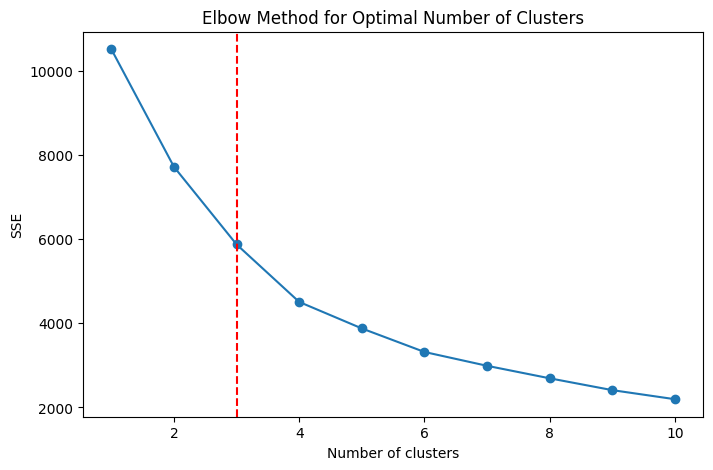

In [14]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming you have scaled_features defined

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)  # Explicitly setting n_init
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal Number of Clusters')

# Finding the elbow point
plt.axvline(x=3, color='r', linestyle='--')  # Assuming the elbow point is at 3 clusters

plt.show()


In [15]:
# Choose the optimal number of clusters based on the Elbow plot
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


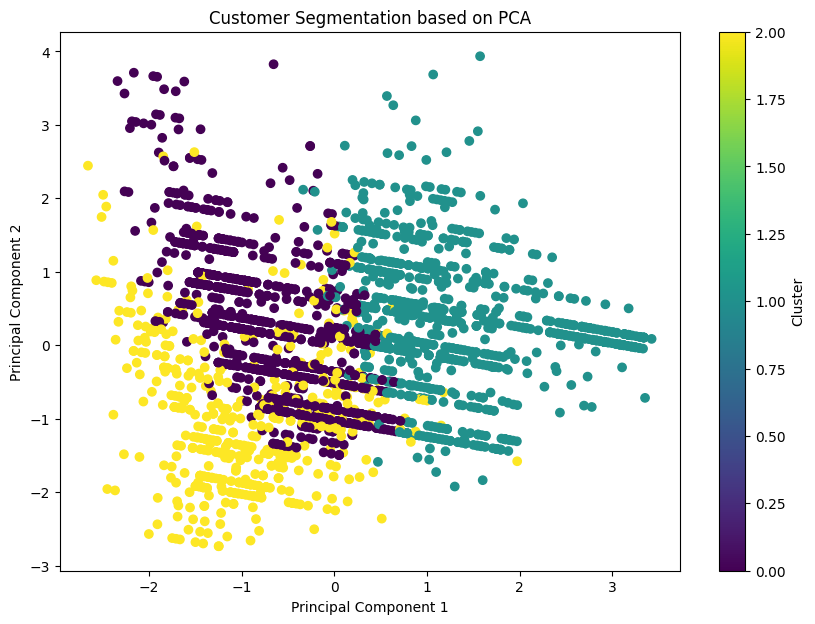

In [16]:
# Visualization with PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
data['PC1'] = principal_components[:, 0]
data['PC2'] = principal_components[:, 1]

plt.figure(figsize=(10, 7))
plt.scatter(data['PC1'], data['PC2'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Customer Segmentation based on PCA')
plt.colorbar(label='Cluster')
plt.show()

In [17]:
# Display the first few rows with cluster labels
print(data[['ID', 'Age', 'Work_Experience', 'Family_Size', 'Spending_Score', 'Cluster']].head())

       ID  Age  Work_Experience  Family_Size  Spending_Score  Cluster
0  458989   36              0.0          1.0               1        0
1  458994   37              8.0          4.0               2        2
2  458996   69              0.0          1.0               1        1
3  459000   59             11.0          2.0               3        2
4  459001   19              1.0          4.0               1        0


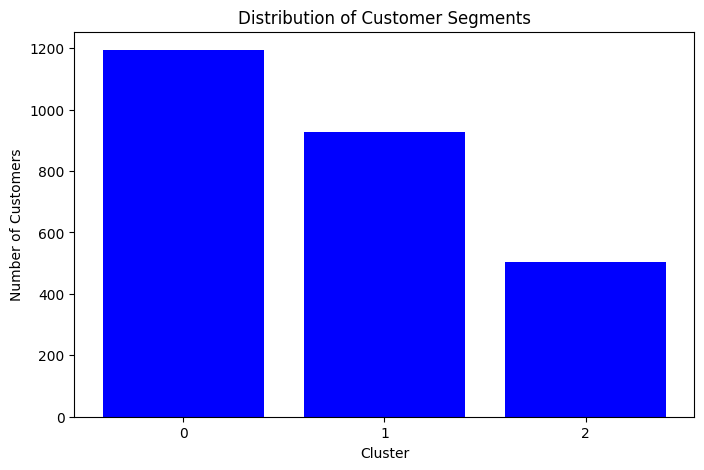

In [18]:
# Bar chart to show the distribution of clusters
plt.figure(figsize=(8, 5))
cluster_counts = data['Cluster'].value_counts().sort_index()
# Use a valid color like 'blue' instead of the colormap name 'viridis'
plt.bar(cluster_counts.index, cluster_counts.values, color='blue')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customer Segments')
plt.xticks(cluster_counts.index)
plt.show()

In [19]:
# Calculate summary statistics for each cluster
cluster_summary = features.groupby(data['Cluster']).mean()

In [20]:
# Calculate the size of each cluster
cluster_size = data['Cluster'].value_counts()

# Display the summary statistics and cluster sizes
print(cluster_summary)
print("\nCluster Sizes:")
print(cluster_size)

               Age  Work_Experience  Family_Size  Spending_Score
Cluster                                                         
0        34.159129         0.912898     2.930486        1.092965
1        59.576509         1.107759     2.758621        2.204741
2        36.821782         8.257426     2.514851        1.332673

Cluster Sizes:
Cluster
0    1194
1     928
2     505
Name: count, dtype: int64


In [ ]:

#Based on the summary statistics and cluster sizes, here are the characteristics and insights for each segment:

#Segment Profiles and Insights

#Cluster 0:
'''
Average Age: 34.16 years
Average Work Experience: 0.91 years
Average Family Size: 2.93 members
Average Spending Score: 1.09 (Low)
Size: 1194 customers
'''
#Insights:
'''
This segment consists of younger individuals with minimal work experience.
They have larger family sizes and a low spending score, indicating frugal spending behavior.
'''

#Recommendations:
'''
Focus on cost-effective products and services.
Promote family-oriented discounts and packages.
Consider educational and career advancement programs to align with their early career stage.
'''

#Cluster 1:
'''
Average Age: 59.58 years
Average Work Experience: 1.11 years
Average Family Size: 2.76 members
Average Spending Score: 2.20 (Average)
Size: 928 customers
'''

#Insights:
'''
This segment consists of older individuals with some work experience.
They have an average family size and a moderate spending score.
'''

#Recommendations:

'''
Offer mid-tier products and services.
Focus on health and wellness products suitable for an older demographic.
Promote community and social engagement activities.
'''

#Cluster 2:
'''
Average Age: 36.82 years
Average Work Experience: 8.26 years
Average Family Size: 2.51 members
Average Spending Score: 1.33 (Low to Average)
Size: 505 customers
'''

#Insights:
'''
This segment consists of individuals in their late 30s with significant work experience.
They have smaller family sizes and a slightly higher spending score compared to Cluster 0 but still lean towards frugal spending.
'''

#Recommendations:
'''
Highlight products and services that offer good value for money.
Promote career growth and professional development opportunities.
Offer loyalty programs to encourage increased spending.
'''

#Summary
'''
Cluster 0: Young, early-career individuals with larger families and low spending habits. Focus on budget-friendly, family-oriented offerings.
Cluster 1: Older, moderately experienced individuals with average family sizes and moderate spending habits. Focus on health, wellness, and social engagement.
Cluster 2: Mid-age, highly experienced individuals with smaller families and low to average spending habits. Focus on value-for-money products and professional development.
By understanding these segments, you can tailor your marketing strategies, product offerings, and customer engagement initiatives to better meet the needs and preferences of each group.
'''